<center><h1>Gunadi_Eben_HW4</h1></center>
<br>
<br>

Name: Eben Gunadi
<br>
Github Username: egunadi
<br>
USC ID: 3976793880

## 1. Take a centered 128 x 128 sub-image of Given CT Image Data set (Pick a section with lots of good features)

### (a) Obtain 180 Projections.

Import packages

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, rescale
import pydicom
from skimage import exposure
import os

Get the DICOM image

In [11]:
dicom_file = '../data/dcm/image12.dcm'
dicom_data = pydicom.dcmread(dicom_file)

# Extract pixel array from DICOM
dicom_image = dicom_data.pixel_array

# Save the original image as .png file
if not os.path.exists('../data/png'):
    os.makedirs('../data/png')

plt.imsave('../data/png/image12.png', dicom_image, cmap='gray')

# Print the shape of the image to check its dimensions
print(f"Original image dimensions: {dicom_image.shape}")

Original image dimensions: (512, 512)


/Users/ebengunadi/anaconda3/envs/bme527/lib/python3.9/site-packages/skimage/transform/radon_transform.py:74: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn(


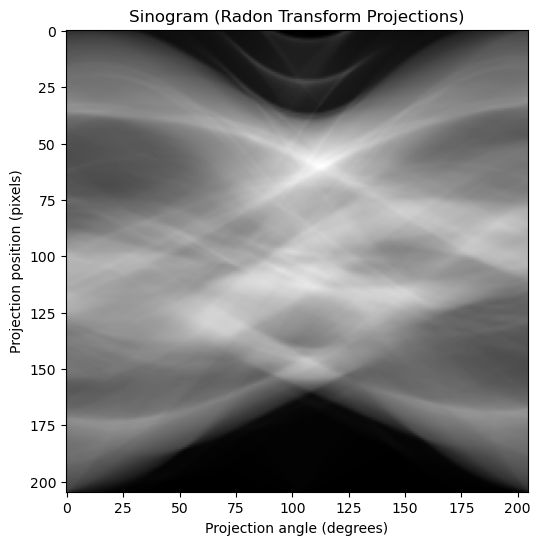

In [8]:
# Normalize the image (DICOM images can have large intensity ranges)
dicom_image = exposure.rescale_intensity(dicom_image, out_range=(0.0, 1.0))

# Rescale the image to 128x128
dicom_image = rescale(dicom_image, scale=0.4, mode='reflect', channel_axis=None)

# Define angles for projections (180 angles from 0 to 180 degrees)
theta = np.linspace(0., 180., max(dicom_image.shape), endpoint=False)

# Perform Radon Transform to obtain 180 projections
sinogram = radon(dicom_image, theta=theta, circle=True)

# Plot sinogram (Projections)
plt.figure(figsize=(6, 6))
plt.imshow(sinogram, cmap='gray')
plt.title('Sinogram (Radon Transform Projections)')
plt.xlabel('Projection angle (degrees)')
plt.ylabel('Projection position (pixels)')
plt.show()

### (b) Perform DCT and Display Data

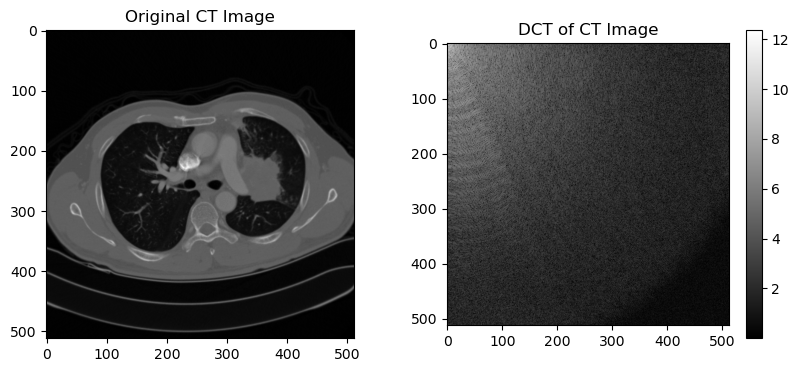

In [23]:
# Perform 2D Discrete Cosine Transform (DCT)
dct_transformed = dct(dct(dicom_image.T, norm='ortho').T, norm='ortho')

# Save the DCT image as .png file
plt.imsave('../data/png/image12_dct.png', np.log(abs(dct_transformed) + 1), cmap='gray')

# Plot the original and DCT result
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(dicom_image, cmap='gray')
plt.title("Original CT Image")

plt.subplot(1, 2, 2)
plt.imshow(np.log(abs(dct_transformed) + 1), cmap='gray')
plt.title("DCT of CT Image")
plt.colorbar()
plt.show()

### (c) Compare with the Fourier transform

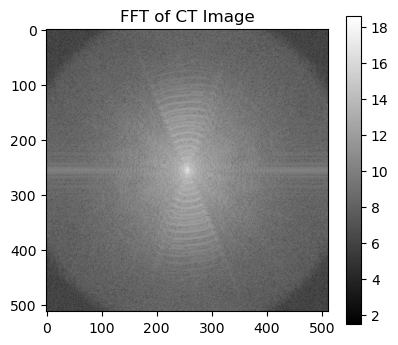

In [28]:
from scipy.fft import fft2, fftshift

# Perform 2D FFT
fft_transformed = fft2(dicom_image)

# Shift the FFT so low frequencies are at the center
fft_transformed_shifted = fftshift(fft_transformed)

# Save the FFT magnitude image as .png file
plt.imsave('../data/png/image12_fft.png', np.log(np.abs(fft_transformed_shifted)), cmap='gray')

# Plot the FFT result (log scale to enhance visibility)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(np.log(np.abs(fft_transformed_shifted)), cmap='gray')
plt.title("FFT of CT Image")
plt.colorbar()

plt.show()

## References and Citations

- https://scikit-image.org/docs/stable/user_guide/install.html